In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Load the data into the pandas environment 

In [8]:
dataset=pd.read_csv('titanic_dataset.csv')

In [9]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2.Reset ‘PassengerId’ as the index column 

In [6]:
dataset=pd.read_csv('titanic_dataset.csv',index_col="PassengerId")

In [7]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [15]:
#Checking the shape of the dataset

In [10]:
dataset.shape

(891, 12)

In [11]:
#Checking the summery of the dataset using info() 

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
#Checking the sum of null values present in our dataset usimg isna().sum()

In [14]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Fill in all the missing values present in all the columns in the dataset 

In [16]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

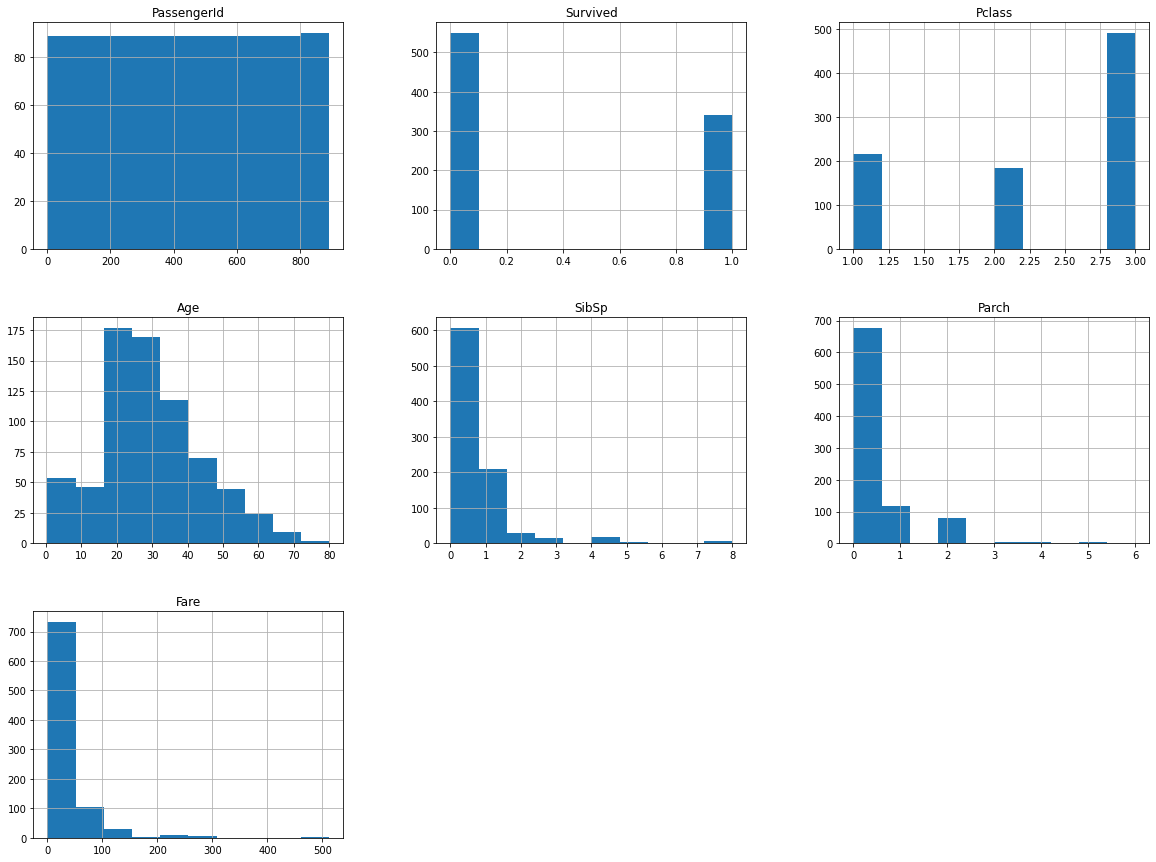

In [17]:
hist_graph=dataset.select_dtypes(include=['int64','float'])
#Plotting histogram
hist_graph.hist(figsize=(20,15))
plt.show()

We can see from the graphs above that some bins show a huge gap between them, which indicates that some values
are missing between those bins.

In [18]:
#We can check the null values using isnull() or isna() and we can use sum() for getting the sum of null values

In [19]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that each age,Cabin and Embarked colmns contains 177,687 and 2 null values

In [20]:
#Plotting distplot to check if the data is skewed

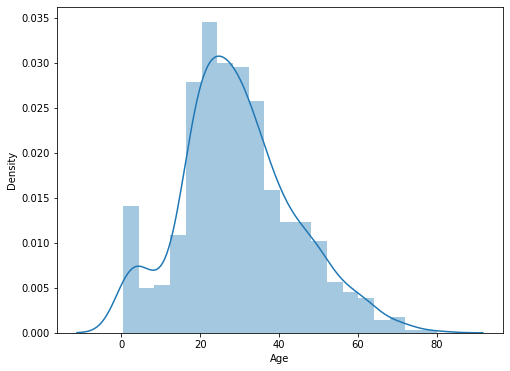

In [21]:
fig,ax=plt.subplots(figsize=(8,6))
sns.distplot(dataset.Age)
plt.show()

We can decide which method should be applied to fill the nan value by checking the skewness of data if data is skewed it is not recommended to use the mean for replacing the missing values. Using mean values for replacing missing values may not create a great model if the data is skewed in such cases we can use median if the value is numerical.We can check the skewness of data by plotting graphs.

In [22]:
#Handling missing values in age column

In [24]:
dataset['Age']=dataset['Age'].fillna(dataset['Age'].median())

In [25]:
#Assignng the categorical 
categ_val=['Cabin']
dataset[categ_val]=dataset[categ_val].fillna(dataset.mode().iloc[0])

In [26]:
categ_val=['Embarked']
dataset[categ_val]=dataset[categ_val].fillna(dataset.mode().iloc[0])

In [27]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
#Checking the null values again

In [29]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# 5. Check and handle outliers

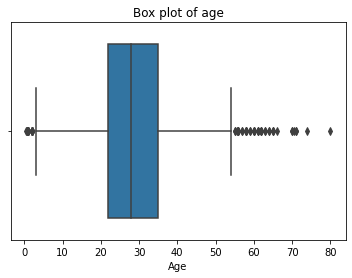

In [31]:
sns.boxplot(dataset['Age'])
plt.title('Box plot of age')
plt.show()

There is an outlier in Age column

In [32]:
#Using IQR method for handling the outlier

In [47]:
Q1=np.percentile(dataset["Age"],25,interpolation="midpoint")
Q2=np.percentile(dataset["Age"],50,interpolation="midpoint")
Q3=np.percentile(dataset["Age"],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
outlier=[]
for x in dataset["Age"]:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)       

In [48]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [63]:
low_data=dataset["Age"]<low_lim
dataset.loc[low_data].index

Int64Index([], dtype='int64')

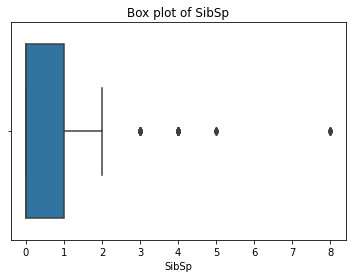

In [62]:
sns.boxplot(dataset['SibSp'])
plt.title('Box plot of SibSp')
plt.show()

In [60]:
Q1=np.percentile(dataset["SibSp"],25,interpolation="midpoint")
Q2=np.percentile(dataset["SibSp"],50,interpolation="midpoint")
Q3=np.percentile(dataset["SibSp"],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
outlier=[]
for x in dataset["SibSp"]:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)    

In [61]:
 outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [68]:
low_data=dataset["SibSp"]<low_lim
dataset.loc[low_data].index

Int64Index([], dtype='int64')

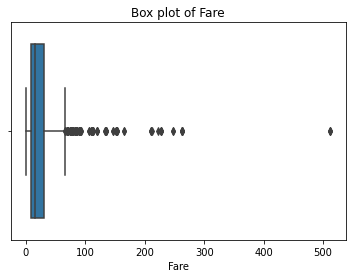

In [69]:
sns.boxplot(dataset['Fare'])
plt.title('Box plot of Fare')
plt.show()

In [66]:
Q1=np.percentile(dataset["Fare"],25,interpolation="midpoint")
Q2=np.percentile(dataset["Fare"],50,interpolation="midpoint")
Q3=np.percentile(dataset["Fare"],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
outlier=[]
for x in dataset["Fare"]:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)       

In [70]:
low_data=dataset["Fare"]<low_lim
dataset.loc[low_data].index

Int64Index([], dtype='int64')

# 5.Calculate min max scaling 

In [73]:
from sklearn import preprocessing

In [76]:
x = np.array([[-400],
              [-100],
              [0],
              [100],
              [400]])
minmaxscaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [77]:
x_scaler = minmaxscaler.fit_transform(x)

In [78]:
x_scaler

array([[0.   ],
       [0.375],
       [0.5  ],
       [0.625],
       [1.   ]])

In [83]:
 x1 = np.array([[1,2,3],
               [4,5,6],
               [7,8,9]])
minmaxscaler1 = preprocessing.MinMaxScaler(feature_range=(0,1))

In [84]:
x_scaler1 = minmaxscaler1.fit_transform(x1)
x_scaler1

array([[0. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [1. , 1. , 1. ]])

In [90]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [107]:
features = dataset.iloc[:,[1]].values

In [108]:
minmaxscaler_as = preprocessing.MinMaxScaler(feature_range=(0,2)) 

In [109]:
features_scale = minmaxscaler_as.fit_transform(features)

In [111]:
features_scale

array([[0.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],